In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Este analisis establece la producción de CO2 con servicios de carros de combustible, dentro de la categoria de HV (High Volume) entre  los años 2020 al 2022.

## Extracción : Se realizó la extracción del dataset de la pagina https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
### High Volume For-Hire Vehicle Trip Records.

### pasos :
### se descargaron los archivos por mes del años 2020, 2021 y 2022.
### Se unificaron todos los meses al año correspondiente.
### del data frame original solo se tuvieron en cuenta los siguientes campos: hvfhs_license_num,	pickup_datetime,	dropoff_datetime	trip_miles y se complementa con información nueva y se crean campos nuevos unificando una sola tabla final los  cuales son :fuel_cost	Fuel efficiency per mile, Fuel consumption during a 12-hour workday, CO2 per mile, Category y year.

## diccionario de datos del data set hv.parquet.
### hvfhs_license_num: Este campo representa el número de licencia o identificador único asociado con el vehículo.
### pickup_datetime: La fecha y hora en que el viaje comenzo.
### dropoff_datetime: La fecha y hora en que el viaje terminó.
### trip_miles: La distancia total del viaje en millas. expresado en millas.
### fuel_cost: El costo del combustible asociado con el viaje. expresado en USD.
### Fuel efficiency per mile: La eficiencia del combustible del vehículo, expresada en términos de millas por galón (MPG).
### Fuel consumption during a 12-hour workday: El consumo de combustible estimado durante un día laboral de 12 horas.
### CO2 per mile: La cantidad de dióxido de carbono (CO2) emitida por cada milla recorrida durante el viaje, lo que está relacionado con la huella de carbono del vehículo.
### Category: La categoría a la que pertenece el viaje.
### year: El año en que se realizó el viaje.

## Se toma una muestra del dataset original de 2.601.254 viajes. entre los años 2020 al 2022.



In [4]:
df_hv = pd.read_parquet('hv.parquet')
df_hv

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_miles,fuel_cost,Fuel efficiency per mile,Fuel consumption during a 12-hour workday,CO2 per mile,Category,year
0,HV0003,2020-01-08 22:52:24,2020-01-08 23:00:00,1.910,2.17,0.07,10.0,2.3,hv,2020
1,HV0003,2020-01-07 07:49:22,2020-01-07 08:00:36,1.730,2.17,0.07,10.0,2.3,hv,2020
2,HV0005,2020-01-19 16:53:36,2020-01-19 17:11:45,4.533,2.17,0.07,10.0,2.3,hv,2020
3,HV0005,2020-01-19 17:20:08,2020-01-19 17:58:26,6.037,2.17,0.07,10.0,2.3,hv,2020
4,HV0003,2020-01-31 08:30:34,2020-01-31 08:37:35,1.220,2.17,0.07,10.0,2.3,hv,2020
...,...,...,...,...,...,...,...,...,...,...
2601249,HV0003,2022-11-08 16:13:32,2022-11-08 16:26:39,2.280,3.20,0.07,10.0,2.3,hv,2022
2601250,HV0003,2022-11-28 20:21:51,2022-11-28 20:34:57,2.660,3.20,0.07,10.0,2.3,hv,2022
2601251,HV0003,2022-11-02 08:28:26,2022-11-02 08:58:12,6.120,3.20,0.07,10.0,2.3,hv,2022
2601252,HV0003,2022-11-04 08:46:59,2022-11-04 09:07:44,5.680,3.20,0.07,10.0,2.3,hv,2022


In [11]:
### Realizo la correción de los valores del campo 'CO2 per mile

# Reemplazo 'CO2 per mile' con el valor 0.296 en todas las filas
df_hv.loc[:, 'CO2 per mile'] = 0.296


In [12]:
df_hv

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_miles,fuel_cost,Fuel efficiency per mile,Fuel consumption during a 12-hour workday,CO2 per mile,Category,year
0,HV0003,2020-01-08 22:52:24,2020-01-08 23:00:00,1.910,2.17,0.07,10.0,0.296,hv,2020
1,HV0003,2020-01-07 07:49:22,2020-01-07 08:00:36,1.730,2.17,0.07,10.0,0.296,hv,2020
2,HV0005,2020-01-19 16:53:36,2020-01-19 17:11:45,4.533,2.17,0.07,10.0,0.296,hv,2020
3,HV0005,2020-01-19 17:20:08,2020-01-19 17:58:26,6.037,2.17,0.07,10.0,0.296,hv,2020
4,HV0003,2020-01-31 08:30:34,2020-01-31 08:37:35,1.220,2.17,0.07,10.0,0.296,hv,2020
...,...,...,...,...,...,...,...,...,...,...
2601249,HV0003,2022-11-08 16:13:32,2022-11-08 16:26:39,2.280,3.20,0.07,10.0,0.296,hv,2022
2601250,HV0003,2022-11-28 20:21:51,2022-11-28 20:34:57,2.660,3.20,0.07,10.0,0.296,hv,2022
2601251,HV0003,2022-11-02 08:28:26,2022-11-02 08:58:12,6.120,3.20,0.07,10.0,0.296,hv,2022
2601252,HV0003,2022-11-04 08:46:59,2022-11-04 09:07:44,5.680,3.20,0.07,10.0,0.296,hv,2022


In [13]:
df_hv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601254 entries, 0 to 2601253
Data columns (total 10 columns):
 #   Column                                     Dtype         
---  ------                                     -----         
 0   hvfhs_license_num                          object        
 1   pickup_datetime                            datetime64[us]
 2   dropoff_datetime                           datetime64[us]
 3   trip_miles                                 float64       
 4   fuel_cost                                  float64       
 5   Fuel efficiency per mile                   float64       
 6   Fuel consumption during a 12-hour workday  float64       
 7   CO2 per mile                               float64       
 8   Category                                   object        
 9   year                                       int32         
dtypes: datetime64[us](2), float64(5), int32(1), object(2)
memory usage: 188.5+ MB


In [14]:
# Reviso si existen espacios nulos.
espacios_nulos = df_hv.isnull().sum()

espacios_nulos


hvfhs_license_num                            0
pickup_datetime                              0
dropoff_datetime                             0
trip_miles                                   0
fuel_cost                                    0
Fuel efficiency per mile                     0
Fuel consumption during a 12-hour workday    0
CO2 per mile                                 0
Category                                     0
year                                         0
dtype: int64

In [15]:
### Reviso la estadistica de las variables numericas.
df_hv.describe()

,pickup_datetime,dropoff_datetime,trip_miles,fuel_cost,Fuel efficiency per mile,Fuel consumption during a 12-hour workday,CO2 per mile,year
count,2601254,2601254,2.601254e+06,2.601254e+06,2.601254e+06,2601254.0,2.601254e+06,2.601254e+06
mean,2021-06-26 15:59:47.216126,2021-06-26 16:17:51.042883,4.831184e+00,2.513334e+00,7.000000e-02,10.0,2.960000e-01,2.021000e+03
min,2020-01-01 00:00:03,2020-01-01 00:05:21,0.000000e+00,2.170000e+00,7.000000e-02,10.0,2.960000e-01,2.020000e+03
25%,2020-10-01 00:00:36,2020-10-01 00:13:40.250000,1.620000e+00,2.170000e+00,7.000000e-02,10.0,2.960000e-01,2.020000e+03
50%,2021-07-01 00:02:19,2021-07-01 00:19:24,2.990000e+00,2.170000e+00,7.000000e-02,10.0,2.960000e-01,2.021000e+03
75%,2022-03-24 13:25:55.750000,2022-03-24 13:44:42,5.970000e+00,3.200000e+00,7.000000e-02,10.0,2.960000e-01,2.022000e+03
max,2022-11-30 23:59:24,2022-12-01 00:36:09,5.324210e+02,3.200000e+00,7.000000e-02,10.0,2.960000e-01,2.022000e+03
std,NaN,NaN,5.523007e+00,4.855469e-01,2.081669e-16,0.0,1.665335e-15,8.164969e-01


### Analítica inicial .
### count: no hay datos faltantes en el conjunto de datos.
### mean (media):La distancia promedio del viaje es de aproximadamente 4.83 millas, el costo promedio de combustible es de alrededor de $2.51, y la eficiencia de combustible por milla es de aproximadamente 0.07.
### min (mínimo): la distancia mínima de viaje es 0 millas, el costo mínimo de combustible es $2.17, y el mínimo para la eficiencia de combustible y CO2 por milla es 0.07 y 2.3, respectivamente.
### 25%, 50%, 75% (cuartiles): el 25% de los viajes tienen una distancia inferior a 1.62 millas, el 50% tienen una distancia inferior a 2.99 millas, y el 75% tienen una distancia inferior a 5.97 millas.
### max (máximo): el viaje maximo 532 millas valor de combustible maximo 3.20 USD.
### std (desviación estándar): la desviación estándar de la distancia del viaje es de aproximadamente 5.52 millas.
### NaN (Not a Number): En la fila "std," parece haber valores NaN en las columnas correspondientes a "pickup_datetime" y "dropoff_datetime." Esto podría indicar que hay valores faltantes en estas columnas.

In [16]:
# Verifico  de nuevo valores faltantes en el DataFrame
# No se observan valores faltantes en ninguno de los campos del dataframe.
valores_faltantes = df_hv.isnull().sum()

print(valores_faltantes)


hvfhs_license_num                            0
pickup_datetime                              0
dropoff_datetime                             0
trip_miles                                   0
fuel_cost                                    0
Fuel efficiency per mile                     0
Fuel consumption during a 12-hour workday    0
CO2 per mile                                 0
Category                                     0
year                                         0
dtype: int64


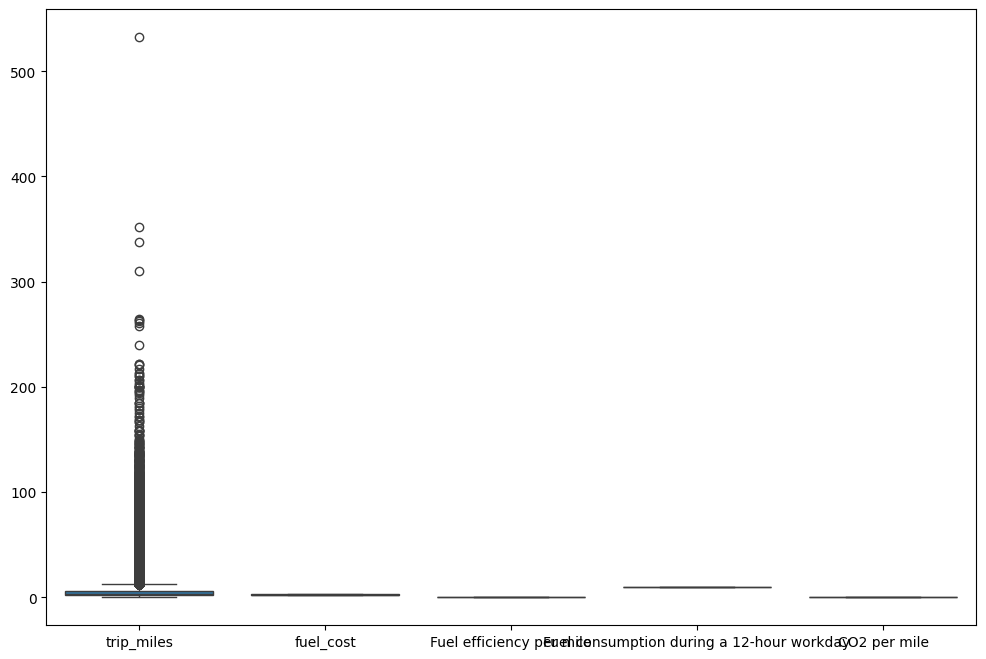

In [17]:
###  verificando outliers.


# Selecciono columnas numéricas para analizar outliers
columnas_numericas = ['trip_miles', 'fuel_cost', 'Fuel efficiency per mile', 'Fuel consumption during a 12-hour workday', 'CO2 per mile']

# Creo un subconjunto del DataFrame con las columnas numéricas
df_numericas = df_hv[columnas_numericas]

# Configuro el tamaño de la figura
plt.figure(figsize=(12, 8))

# Creo boxplots para cada columna numérica
sns.boxplot(data=df_numericas)


plt.show()


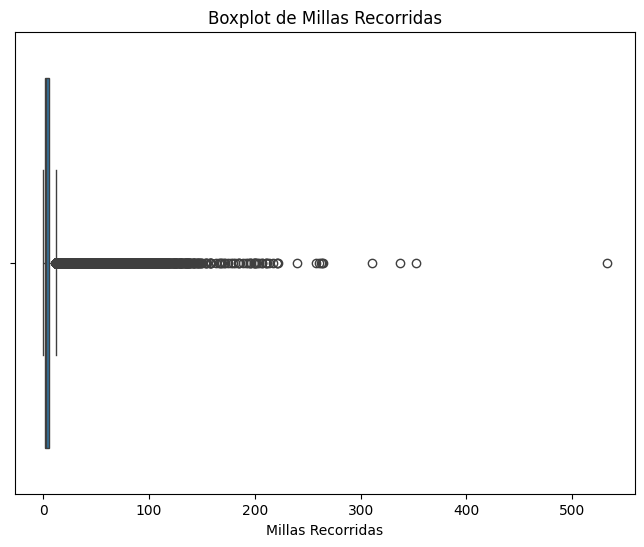

In [19]:


# Selecciono la columna "trip_miles" para el análisis de outliers
trip_miles = df_hv['trip_miles']

# Configuro el tamaño de la figura
plt.figure(figsize=(8, 6))

# Creo un boxplot para "trip_miles"
sns.boxplot(x=trip_miles)

#  título y etiquetas
plt.title('Boxplot de Millas Recorridas')
plt.xlabel('Millas Recorridas')

plt.show()


In [20]:


# Calculo el promedio de "trip_miles"
promedio_trip_miles = df_hv['trip_miles'].mean()

# Creo un DataFrame con el promedio
df_promedio = pd.DataFrame({'Campo': ['trip_miles'], 'Promedio': [promedio_trip_miles]})


print(df_promedio)


        Campo  Promedio
0  trip_miles  4.831184


In [21]:
# "Verifico las mayores distancias recorridas entre la hora de inicio del servicio 
#  y la hora final del servicio para descartar los outliers presentados en las gráficas anteriores."

# Ordeno el DataFrame por la columna "trip_miles" en orden descendente
df_top_distances = df_hv.sort_values(by='trip_miles', ascending=False).head(5)

# llamo la tabla con las 5 mayores distancias recorridas
print(df_top_distances[['pickup_datetime', 'dropoff_datetime', 'trip_miles']])


            pickup_datetime    dropoff_datetime  trip_miles
2208623 2022-07-14 11:47:32 2022-07-14 21:29:35     532.421
2273216 2022-07-29 12:32:27 2022-07-29 19:56:04     352.186
1022096 2021-03-24 09:16:37 2021-03-24 14:51:59     337.390
307201  2020-05-17 15:11:08 2020-05-17 20:09:54     310.380
1212816 2021-05-22 01:49:53 2021-05-22 06:32:03     264.390


#### Se observan servicios por más de 8 horas. 2022-07-14 inicio del servicio 11:47:32  y fin del servicio 21:29:35.
### las mayores distancias recorridas corresponden a servicios especiales de transporte en donde un pasajero contrata el servicio por un viaje durante todo el dia. se descarta la presencia de outliers.

# Estadisticas analítica y descriptiva.
### Promedio de viajes cortos, medianos y largos años 2020,2021,2022.

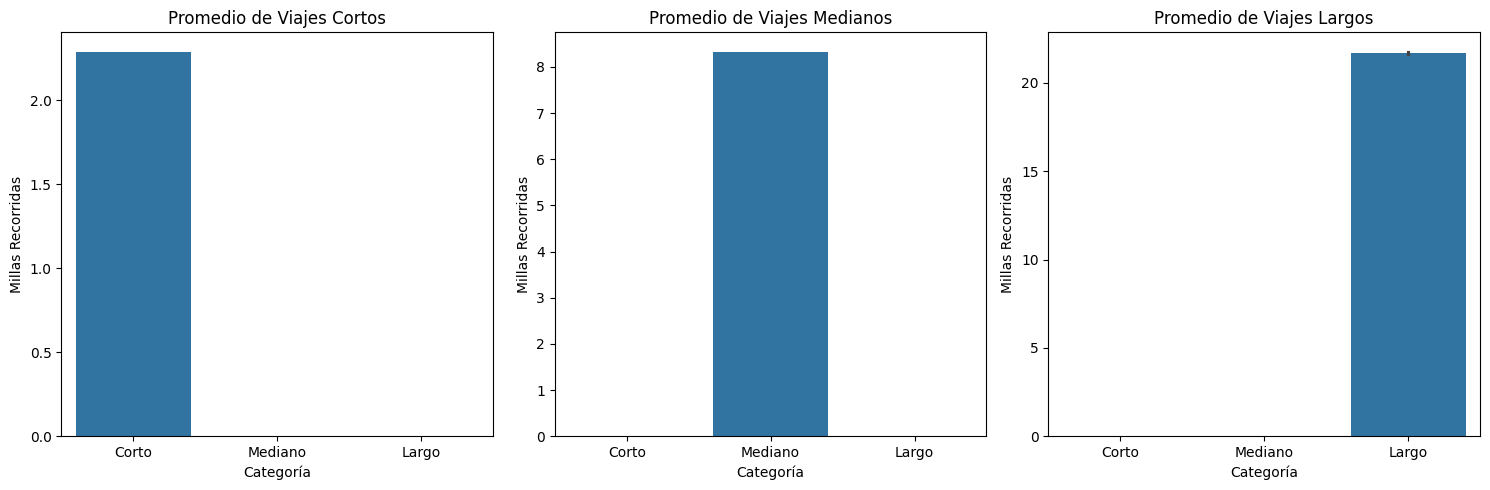

In [22]:
# llamo el promedio de viajes cortos, medianos y largos.

# Creo columnas para categorizar los viajes
df_hv['Duracion del Viaje'] = pd.cut(df_hv['trip_miles'], bins=[0, 5, 15, float('inf')], labels=['Corto', 'Mediano', 'Largo'])

# Configuro el tamaño de la figura
plt.figure(figsize=(15, 5))

# Subgráfica 1: Promedio de viajes cortos
plt.subplot(1, 3, 1)
sns.barplot(x='Duracion del Viaje', y='trip_miles', data=df_hv[df_hv['Duracion del Viaje'] == 'Corto'], estimator='mean')
plt.title('Promedio de Viajes Cortos')
plt.xlabel('Categoría')
plt.ylabel('Millas Recorridas')

# Subgráfica 2: Promedio de viajes medianos
plt.subplot(1, 3, 2)
sns.barplot(x='Duracion del Viaje', y='trip_miles', data=df_hv[df_hv['Duracion del Viaje'] == 'Mediano'], estimator='mean')
plt.title('Promedio de Viajes Medianos')
plt.xlabel('Categoría')
plt.ylabel('Millas Recorridas')

# Subgráfica 3: Promedio de viajes largos
plt.subplot(1, 3, 3)
sns.barplot(x='Duracion del Viaje', y='trip_miles', data=df_hv[df_hv['Duracion del Viaje'] == 'Largo'], estimator='mean')
plt.title('Promedio de Viajes Largos')
plt.xlabel('Categoría')
plt.ylabel('Millas Recorridas')

# Ajusto el diseño de las subgráficas
plt.tight_layout()


plt.show()


In [23]:
### Complemento la información de la grafica anterior con una tabla. 

# Creo columnas para categorizar los viajes
df_hv['Duracion del Viaje'] = pd.cut(df_hv['trip_miles'], bins=[0, 5, 15, float('inf')], labels=['Corto', 'Mediano', 'Largo'])

# Calculo el promedio de millas recorridas para cada categoría
promedio_por_categoria = df_hv.groupby('Duracion del Viaje', observed=False)['trip_miles'].mean().reset_index()

# Renombro las columnas
promedio_por_categoria.columns = ['Duracion del Viaje', 'Promedio de Millas Recorridas']

print(promedio_por_categoria)


  Duracion del Viaje  Promedio de Millas Recorridas
0              Corto                       2.287046
1            Mediano                       8.325347
2              Largo                      21.711032


### Numero total de millas recorridas para los años 2020, 2021, 2022.


In [24]:


# Agrupo por año y sumar las millas recorridas
tabla_millas_por_año = df_hv.groupby('year')['trip_miles'].sum().reset_index()

# Renombro las columnas
tabla_millas_por_año.columns = ['Año', 'Número Total de Millas Recorridas']


print(tabla_millas_por_año)


    Año  Número Total de Millas Recorridas
0  2020                        4013069.257
1  2021                        4187411.199
2  2022                        4366657.282


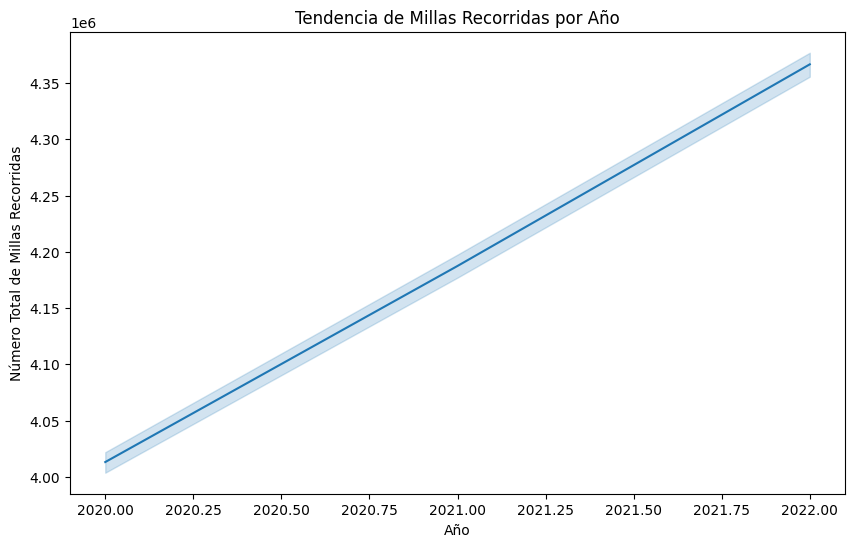

In [26]:
### Analizo la tendecia en cuanto a los tres años del analisis.

# Configuro el tamaño de la figura
plt.figure(figsize=(10, 6))

# Creo una gráfica de tendencia para las millas recorridas por año
sns.lineplot(x='year', y='trip_miles', data=df_hv, estimator=sum)

# título y etiquetas
plt.title('Tendencia de Millas Recorridas por Año')
plt.xlabel('Año')
plt.ylabel('Número Total de Millas Recorridas')


plt.show()



### Producción de CO2 durante los años 2020,2021,2022.

In [27]:

# Calculo el total de CO2 producido por año
data = []
for year in [2020, 2021, 2022]:
    total_millas = df_hv[df_hv['year'] == year]['trip_miles'].sum()
    total_co2 = total_millas * 0.296 / 1e6  # Divido por 1,000,000 para expresar en millones de toneladas
    data.append({'Año': year, 'Producción Total de CO2 (Millones de Toneladas)': total_co2})

# Creo el DataFrame directamente con la lista de diccionarios
df_tabla_co2_gasolina = pd.DataFrame(data)


print("Producción Total de CO2 por Año (Millones de Toneladas):")
df_tabla_co2_gasolina


Producción Total de CO2 por Año (Millones de Toneladas):


,Año,Producción Total de CO2 (Millones de Toneladas)
0,2020,1.187869
1,2021,1.239474
2,2022,1.292531


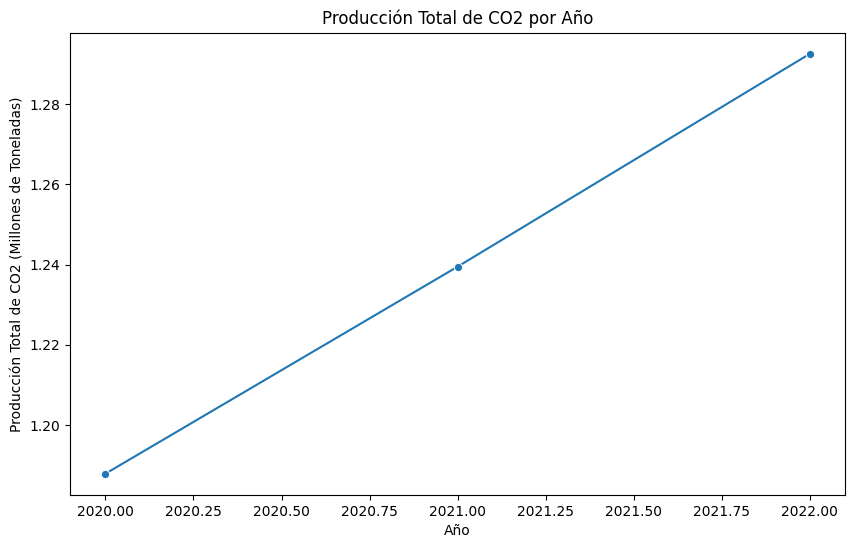

In [28]:

# Grafico la producción total de CO2 por año en curvas
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Producción Total de CO2 (Millones de Toneladas)', data=df_tabla_co2_gasolina, marker='o')
plt.title('Producción Total de CO2 por Año')
plt.xlabel('Año')
plt.ylabel('Producción Total de CO2 (Millones de Toneladas)')
plt.show()


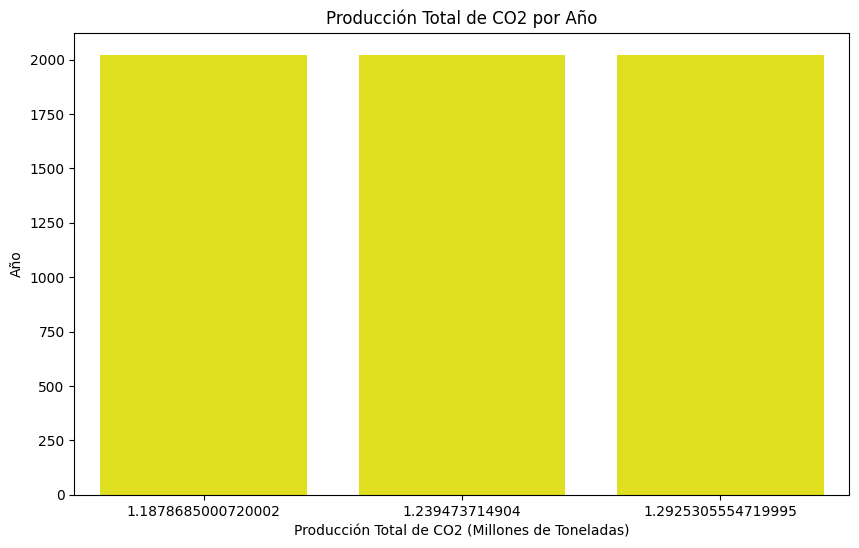

In [29]:

# Grafico la producción total de CO2 por año en barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x='Producción Total de CO2 (Millones de Toneladas)', y='Año', data=df_tabla_co2_gasolina, color='yellow')
plt.title('Producción Total de CO2 por Año')
plt.xlabel('Producción Total de CO2 (Millones de Toneladas)')
plt.ylabel('Año')
plt.show()


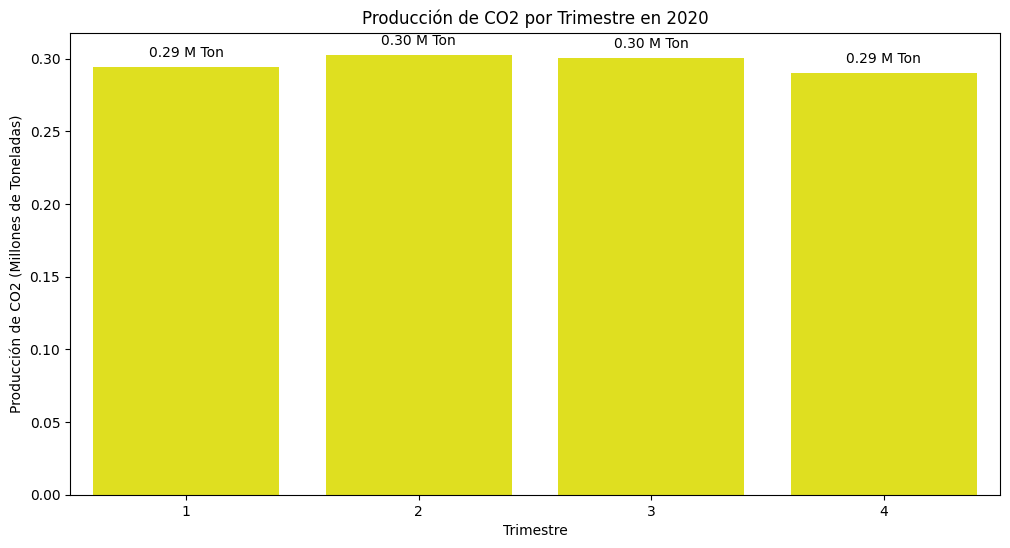

In [30]:

df_2020 = df_hv[df_hv['year'] == 2020].copy()
df_2020['quarter'] = df_2020['pickup_datetime'].dt.quarter

# Calculo la producción de CO2 por trimestre
df_co2_trimestre = df_2020.groupby('quarter')['trip_miles'].sum() * 0.296 / 1e6

# Grafico la producción de CO2 por trimestre
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df_co2_trimestre.index, y=df_co2_trimestre.values, color='yellow')

# Añado los valores debajo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f} M Ton', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Producción de CO2 por Trimestre en 2020')
plt.xlabel('Trimestre')
plt.ylabel('Producción de CO2 (Millones de Toneladas)')
plt.show()


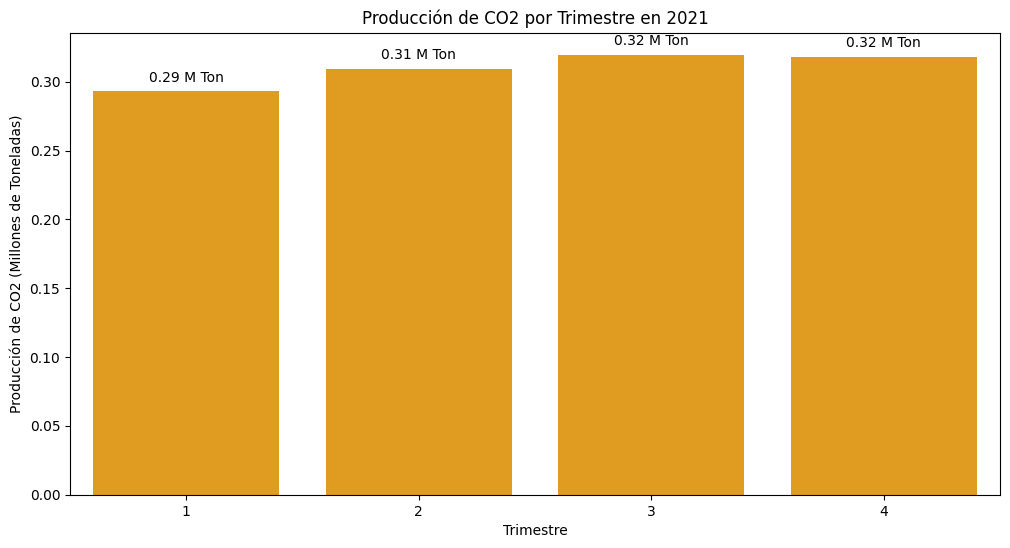

In [31]:
# Filtro el DataFrame para el año 2021
df_2021 = df_hv[df_hv['year'] == 2021].copy()
df_2021['quarter'] = df_2021['pickup_datetime'].dt.quarter

# Calculo la producción de CO2 por trimestre
df_co2_trimestre_2021 = df_2021.groupby('quarter')['trip_miles'].sum() * 0.296 / 1e6

# Grafico la producción de CO2 por trimestre en 2021
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df_co2_trimestre_2021.index, y=df_co2_trimestre_2021.values, color='orange')

# Añado los valores debajo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f} M Ton', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Producción de CO2 por Trimestre en 2021')
plt.xlabel('Trimestre')
plt.ylabel('Producción de CO2 (Millones de Toneladas)')
plt.show()


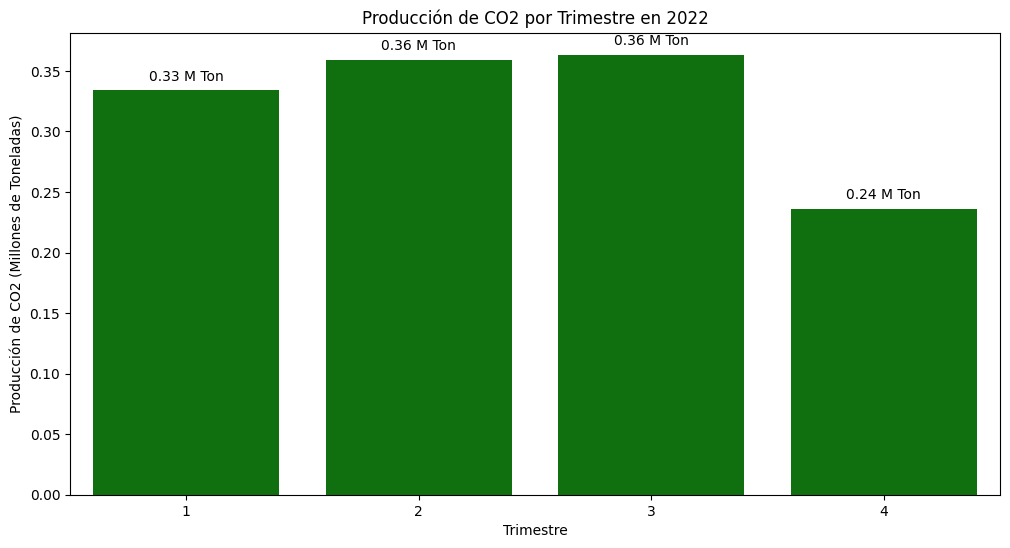

In [32]:
# Filtro el DataFrame para el año 2022
df_2022 = df_hv[df_hv['year'] == 2022].copy()
df_2022['quarter'] = df_2022['pickup_datetime'].dt.quarter

# Calculo la producción de CO2 por trimestre
df_co2_trimestre_2022 = df_2022.groupby('quarter')['trip_miles'].sum() * 0.296 / 1e6

# Grafico la producción de CO2 por trimestre en 2022
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df_co2_trimestre_2022.index, y=df_co2_trimestre_2022.values, color='green')

# Añado los valores debajo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f} M Ton', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Producción de CO2 por Trimestre en 2022')
plt.xlabel('Trimestre')
plt.ylabel('Producción de CO2 (Millones de Toneladas)')
plt.show()


### Consumo de combustible HV.

In [29]:
# Calculo el gasto total en combustible para cada año
total_fuel_cost_2020 = (df_2020['fuel_cost'] * df_2020['trip_miles']).sum() / 1e6
total_fuel_cost_2021 = (df_2021['fuel_cost'] * df_2021['trip_miles']).sum() / 1e6
total_fuel_cost_2022 = (df_2022['fuel_cost'] * df_2022['trip_miles']).sum() / 1e6


print(f"Gasto total en combustible para 2020: ${total_fuel_cost_2020:.2f} millones")
print(f"Gasto total en combustible para 2021: ${total_fuel_cost_2021:.2f} millones")
print(f"Gasto total en combustible para 2022: ${total_fuel_cost_2022:.2f} millones")


Gasto total en combustible para 2020: $8.71 millones
Gasto total en combustible para 2021: $9.09 millones
Gasto total en combustible para 2022: $13.97 millones


## Produccion CO2 consumo eléctrico y gasto con consumo eléctrico.

### Costo del khw por milla recorrida 0.015 centavos de dolar.
### produccion de CO2 por milla recorrida. 0.03 gramos. ( teniendo en cuenta que el punto de carga genera 7.3 kilogrmos de CO2 sobre una autonomia 245 millas o 45 kwh.)

In [33]:
df_hv

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_miles,fuel_cost,Fuel efficiency per mile,Fuel consumption during a 12-hour workday,CO2 per mile,Category,year,Duracion del Viaje
0,HV0003,2020-01-08 22:52:24,2020-01-08 23:00:00,1.910,2.17,0.07,10.0,0.296,hv,2020,Corto
1,HV0003,2020-01-07 07:49:22,2020-01-07 08:00:36,1.730,2.17,0.07,10.0,0.296,hv,2020,Corto
2,HV0005,2020-01-19 16:53:36,2020-01-19 17:11:45,4.533,2.17,0.07,10.0,0.296,hv,2020,Corto
3,HV0005,2020-01-19 17:20:08,2020-01-19 17:58:26,6.037,2.17,0.07,10.0,0.296,hv,2020,Mediano
4,HV0003,2020-01-31 08:30:34,2020-01-31 08:37:35,1.220,2.17,0.07,10.0,0.296,hv,2020,Corto
...,...,...,...,...,...,...,...,...,...,...,...
2601249,HV0003,2022-11-08 16:13:32,2022-11-08 16:26:39,2.280,3.20,0.07,10.0,0.296,hv,2022,Corto
2601250,HV0003,2022-11-28 20:21:51,2022-11-28 20:34:57,2.660,3.20,0.07,10.0,0.296,hv,2022,Corto
2601251,HV0003,2022-11-02 08:28:26,2022-11-02 08:58:12,6.120,3.20,0.07,10.0,0.296,hv,2022,Mediano
2601252,HV0003,2022-11-04 08:46:59,2022-11-04 09:07:44,5.680,3.20,0.07,10.0,0.296,hv,2022,Mediano


In [34]:
df_hv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601254 entries, 0 to 2601253
Data columns (total 11 columns):
 #   Column                                     Dtype         
---  ------                                     -----         
 0   hvfhs_license_num                          object        
 1   pickup_datetime                            datetime64[us]
 2   dropoff_datetime                           datetime64[us]
 3   trip_miles                                 float64       
 4   fuel_cost                                  float64       
 5   Fuel efficiency per mile                   float64       
 6   Fuel consumption during a 12-hour workday  float64       
 7   CO2 per mile                               float64       
 8   Category                                   object        
 9   year                                       int32         
 10  Duracion del Viaje                         category      
dtypes: category(1), datetime64[us](2), float64(5), int32(1), object

In [35]:
### Gasto en dolares por consumo eléctrico .(2020,2021,2022)

# Defino las variables
costo_kwh_por_milla = 0.03

# Filtro por los años 2020, 2021 y 2022
df_filt = df_hv[df_hv['year'].isin([2020, 2021, 2022])]

# Calculo el gasto total en dólares para cada año
df_filt['gasto_total_dolares'] = df_filt['trip_miles'] * costo_kwh_por_milla

# Calculo el total de gasto en dólares para los años 2020, 2021 y 2022
total_gasto_dolares_electrico = df_filt.groupby('year')['gasto_total_dolares'].sum()

print(total_gasto_dolares_electrico)


year
2020    120392.07771
2021    125622.33597
2022    130999.71846
Name: gasto_total_dolares, dtype: float64


In [36]:
# produccción CO2 carro electrico.
# Definición de las variables
co2_por_milla = 0.02

# Filtrar por los años 2020, 2021 y 2022
df_filt = df_hv[df_hv['year'].isin([2020, 2021, 2022])]

# Calcular la producción total de CO2 en toneladas para cada año
df_filt['produccion_co2_toneladas'] = df_filt['trip_miles'] * co2_por_milla / 1000  # Convertir gramos a toneladas

# Calcular el total de producción de CO2 para los años 2020, 2021 y 2022
total_produccion_co2_toneladas_electrico = df_filt.groupby('year')['produccion_co2_toneladas'].sum()

# Mostrar el resultado
print(total_produccion_co2_toneladas_electrico)


year
2020    80.261385
2021    83.748224
2022    87.333146
Name: produccion_co2_toneladas, dtype: float64


In [43]:
### Guardo los valores en variables para las estadisticas finales.
produccion_co2_electrico_2020 = 80261.0
produccion_co2_electrico_2021 = 83748.0
produccion_co2_electrico_2022 = 87333.0

produccion_co2_gasolina_2020 = 1187869.0
produccion_co2_gasolina_2021 = 1239474.0
produccion_co2_gasolina_2022 = 1292531.0

gasto_autonomia_electrica_2020 = 120392.0
gasto_autonomia_electrica_2021 = 125622.0
gasto_autonomia_electrica_2022 = 130999.0

gasto_autonomia_gasolina_2020 = 8700000.0 
gasto_autonomia_gasolina_2021 = 9000000.0
gasto_autonomia_gasolina_2022 = 14000000.0

## diferencias 

# Calculo diferencias en millones
diferencia_produccion_co2_2020 = (produccion_co2_gasolina_2020 - produccion_co2_electrico_2020) / 1e6
diferencia_produccion_co2_2021 = (produccion_co2_gasolina_2021 - produccion_co2_electrico_2021) / 1e6
diferencia_produccion_co2_2022 = (produccion_co2_gasolina_2022 - produccion_co2_electrico_2022) / 1e6


print("Diferencias en millones producción de co2 combustible VS electrico:")
print(f"Diferencia Producción CO2 2020: {diferencia_produccion_co2_2020} millones")
print(f"Diferencia Producción CO2 2021: {diferencia_produccion_co2_2021} millones")
print(f"Diferencia Producción CO2 2022: {diferencia_produccion_co2_2022} millones")









Diferencias en millones producción de co2 combustible VS electrico:
Diferencia Producción CO2 2020: 1.107608 millones
Diferencia Producción CO2 2021: 1.155726 millones
Diferencia Producción CO2 2022: 1.205198 millones


In [44]:
# Calculo diferencias en millones
diferencia_gasto_autonomia_2020 = (gasto_autonomia_gasolina_2020 - gasto_autonomia_electrica_2020) / 1e6
diferencia_gasto_autonomia_2021 = (gasto_autonomia_gasolina_2021 - gasto_autonomia_electrica_2021) / 1e6
diferencia_gasto_autonomia_2022 = (gasto_autonomia_gasolina_2022 - gasto_autonomia_electrica_2022) / 1e6

print("Diferencias en millones gasto combustible VS electrico:")
print(f"Diferencia Gasto Autonomía 2020: {diferencia_gasto_autonomia_2020} millones")
print(f"Diferencia Gasto Autonomía 2021: {diferencia_gasto_autonomia_2021} millones")
print(f"Diferencia Gasto Autonomía 2022: {diferencia_gasto_autonomia_2022} millones")



Diferencias en millones gasto combustible VS electrico:
Diferencia Gasto Autonomía 2020: 8.579608 millones
Diferencia Gasto Autonomía 2021: 8.874378 millones
Diferencia Gasto Autonomía 2022: 13.869001 millones


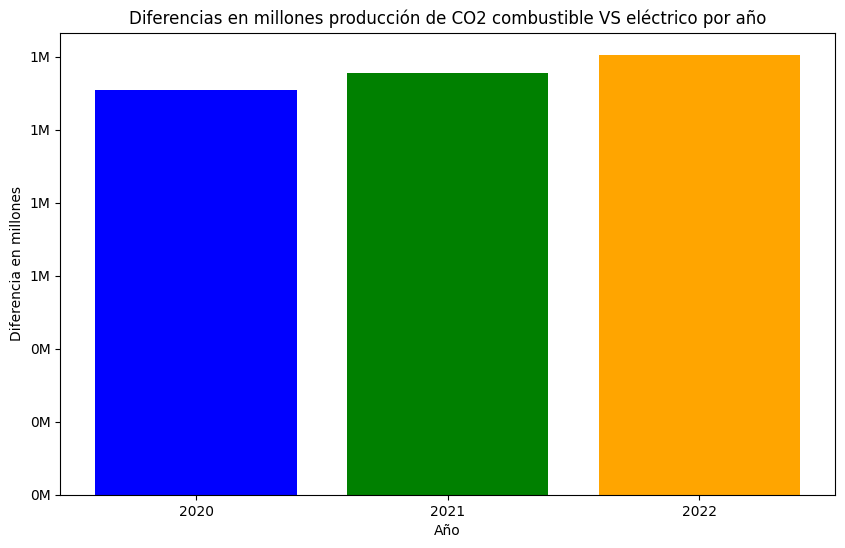

In [45]:


# Datos
years = [2020, 2021, 2022]
diferencias_produccion_co2_millones = [
    diferencia_produccion_co2_2020,
    diferencia_produccion_co2_2021,
    diferencia_produccion_co2_2022
]

# Grafico de barras para las diferencias en millones
plt.figure(figsize=(10, 6))
plt.bar(years, diferencias_produccion_co2_millones, color=['blue', 'green', 'orange'])
plt.title('Diferencias en millones producción de CO2 combustible VS eléctrico por año')
plt.xlabel('Año')
plt.ylabel('Diferencia en millones')
plt.xticks(years)

# Formateo el eje  para mostrar valores en millones
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.show()


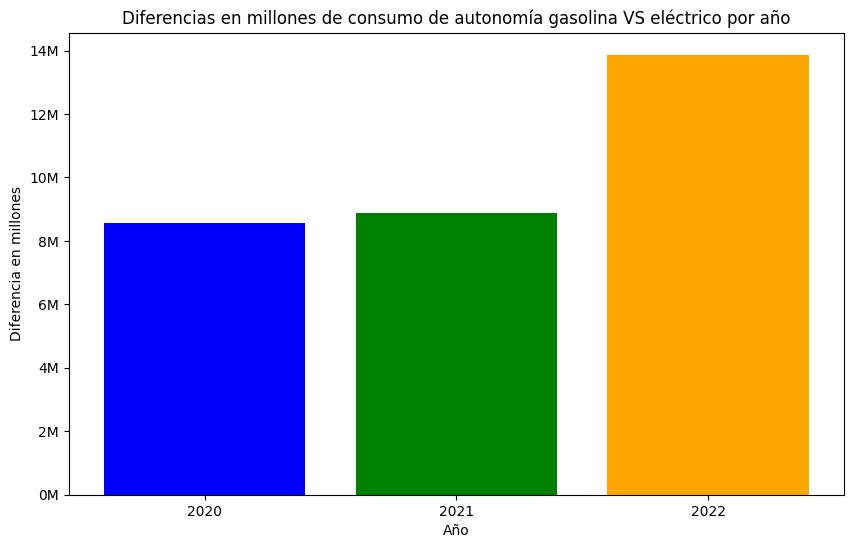

In [46]:


# Datos
years = [2020, 2021, 2022]
diferencias_gasto_autonomia_millones = [
    diferencia_gasto_autonomia_2020,
    diferencia_gasto_autonomia_2021,
    diferencia_gasto_autonomia_2022
]

# Grafico de barras para las diferencias en millones
plt.figure(figsize=(10, 6))
plt.bar(years, diferencias_gasto_autonomia_millones, color=['blue', 'green', 'orange'])
plt.title('Diferencias en millones de consumo de autonomía gasolina VS eléctrico por año')
plt.xlabel('Año')
plt.ylabel('Diferencia en millones')
plt.xticks(years)

# Formatear el eje y para mostrar valores en millones
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.show()


In [47]:
### muestro la diferencia en una tabla de pandas.

# Datos
data = {
    'Año': [2020, 2021, 2022],
    'Dif. Producción CO2 (M)': [
        diferencia_produccion_co2_2020,
        diferencia_produccion_co2_2021,
        diferencia_produccion_co2_2022
    ],
    'Dif. Consumo Autonomía (M)': [
        diferencia_gasto_autonomia_2020,
        diferencia_gasto_autonomia_2021,
        diferencia_gasto_autonomia_2022
    ]
}

# Creo un DataFrame
df_diferencias = pd.DataFrame(data)

print(df_diferencias)


    Año  Dif. Producción CO2 (M)  Dif. Consumo Autonomía (M)
0  2020                 1.107608                    8.579608
1  2021                 1.155726                    8.874378
2  2022                 1.205198                   13.869001


In [48]:
### creo una tabla de pandas con los consumos a gasolina y eléctrico y la producción de CO2  de los mismos.

# Datos
data = {
    'Año': [2020, 2021, 2022],
    'Producción CO2 Eléctrico': [
        produccion_co2_electrico_2020,
        produccion_co2_electrico_2021,
        produccion_co2_electrico_2022
    ],
    'Producción CO2 Gasolina': [
        produccion_co2_gasolina_2020,
        produccion_co2_gasolina_2021,
        produccion_co2_gasolina_2022
    ],
    'Gasto Autonomía Eléctrica': [
        gasto_autonomia_electrica_2020,
        gasto_autonomia_electrica_2021,
        gasto_autonomia_electrica_2022
    ],
    'Gasto Autonomía Gasolina': [
        gasto_autonomia_gasolina_2020,
        gasto_autonomia_gasolina_2021,
        gasto_autonomia_gasolina_2022
    ]
}

# Creo un DataFrame
df_informacion = pd.DataFrame(data)


df_informacion


,Año,Producción CO2 Eléctrico,Producción CO2 Gasolina,Gasto Autonomía Eléctrica,Gasto Autonomía Gasolina
0,2020,80261.0,1187869.0,120392.0,8700000.0
1,2021,83748.0,1239474.0,125622.0,9000000.0
2,2022,87333.0,1292531.0,130999.0,14000000.0


In [49]:
# Datos adicionales
data_diferencias = {
    'Año': [2020, 2021, 2022],
    'Dif. Producción CO2 (M)': [9.149798, 9.547298, 9.955979],
    'Dif. Consumo Autonomía (M)': [8.579608, 8.874378, 13.869001]
}

# Creo un DataFrame con las diferencias
df_diferencias = pd.DataFrame(data_diferencias)

# Combino los DataFrames
df_resultado = pd.merge(df_informacion, df_diferencias, on='Año')

# Renombro columnas
df_resultado = df_resultado.rename(columns={
    'Dif. Producción CO2 (M)': 'Diferencia Producción CO2 (M)',
    'Dif. Consumo Autonomía (M)': 'Diferencia Consumo Autonomía (M)'
})

df_resultado


,Año,Producción CO2 Eléctrico,Producción CO2 Gasolina,Gasto Autonomía Eléctrica,Gasto Autonomía Gasolina,Diferencia Producción CO2 (M),Diferencia Consumo Autonomía (M)
0,2020,80261.0,1187869.0,120392.0,8700000.0,9.149798,8.579608
1,2021,83748.0,1239474.0,125622.0,9000000.0,9.547298,8.874378
2,2022,87333.0,1292531.0,130999.0,14000000.0,9.955979,13.869001


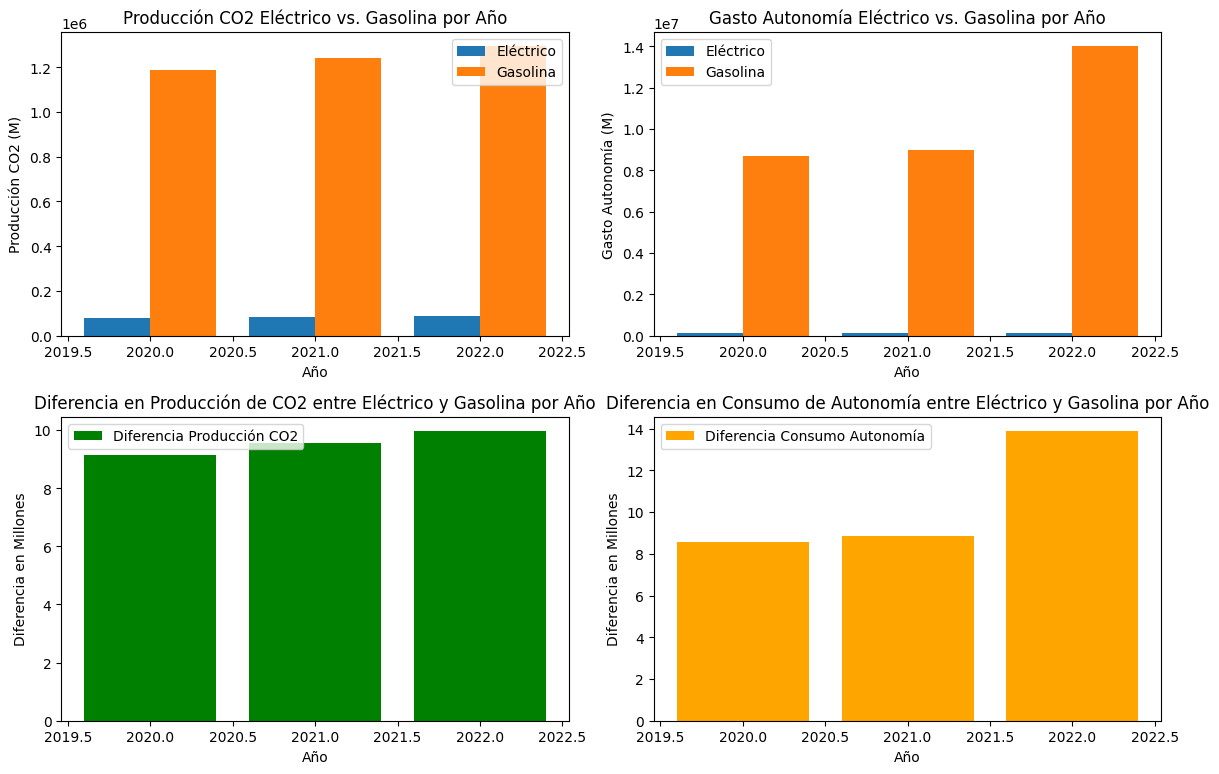

In [51]:


# Creo una figura
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Subgráfica 1: Producción CO2 Eléctrico vs. Gasolina
axs[0, 0].bar(df_resultado['Año'] - 0.2, df_resultado['Producción CO2 Eléctrico'], width=0.4, label='Eléctrico')
axs[0, 0].bar(df_resultado['Año'] + 0.2, df_resultado['Producción CO2 Gasolina'], width=0.4, label='Gasolina')
axs[0, 0].set_title('Producción CO2 Eléctrico vs. Gasolina por Año')
axs[0, 0].set_xlabel('Año')
axs[0, 0].set_ylabel('Producción CO2 (M)')
axs[0, 0].legend()

# Subgráfica 2: Gasto Autonomía Eléctrico vs. Gasolina
axs[0, 1].bar(df_resultado['Año'] - 0.2, df_resultado['Gasto Autonomía Eléctrica'], width=0.4, label='Eléctrico')
axs[0, 1].bar(df_resultado['Año'] + 0.2, df_resultado['Gasto Autonomía Gasolina'], width=0.4, label='Gasolina')
axs[0, 1].set_title('Gasto Autonomía Eléctrico vs. Gasolina por Año')
axs[0, 1].set_xlabel('Año')
axs[0, 1].set_ylabel('Gasto Autonomía (M)')
axs[0, 1].legend()

# Subgráfica 3: Diferencia Producción CO2 (M)
axs[1, 0].bar(df_resultado['Año'], df_resultado['Diferencia Producción CO2 (M)'], color='green', label='Diferencia Producción CO2')
axs[1, 0].set_title('Diferencia en Producción de CO2 entre Eléctrico y Gasolina por Año')
axs[1, 0].set_xlabel('Año')
axs[1, 0].set_ylabel('Diferencia en Millones')
axs[1, 0].legend()

# Subgráfica 4: Diferencia Consumo Autonomía (M)
axs[1, 1].bar(df_resultado['Año'], df_resultado['Diferencia Consumo Autonomía (M)'], color='orange', label='Diferencia Consumo Autonomía')
axs[1, 1].set_title('Diferencia en Consumo de Autonomía entre Eléctrico y Gasolina por Año')
axs[1, 1].set_xlabel('Año')
axs[1, 1].set_ylabel('Diferencia en Millones')
axs[1, 1].legend()

# Ajusto el diseño de las subgráficas.

plt.tight_layout()
plt.show()
